In [67]:
#合并csv文件中的数据，存储在一个dataframe中
import pandas as pd
import glob
files = glob.glob('data/user_data/*.csv')
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)
df.dropna(inplace=True)
df

,user_id,name,location,total_influence,country,event_type,event_action,event_time
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00
...,...,...,...,...,...,...,...,...
1294771,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-04 15:51:52+08:00
1294772,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-15 11:34:32+08:00
1294773,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-16 07:04:20+08:00
1294774,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-07 14:36:44+08:00


## 人口统计分析
- 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。

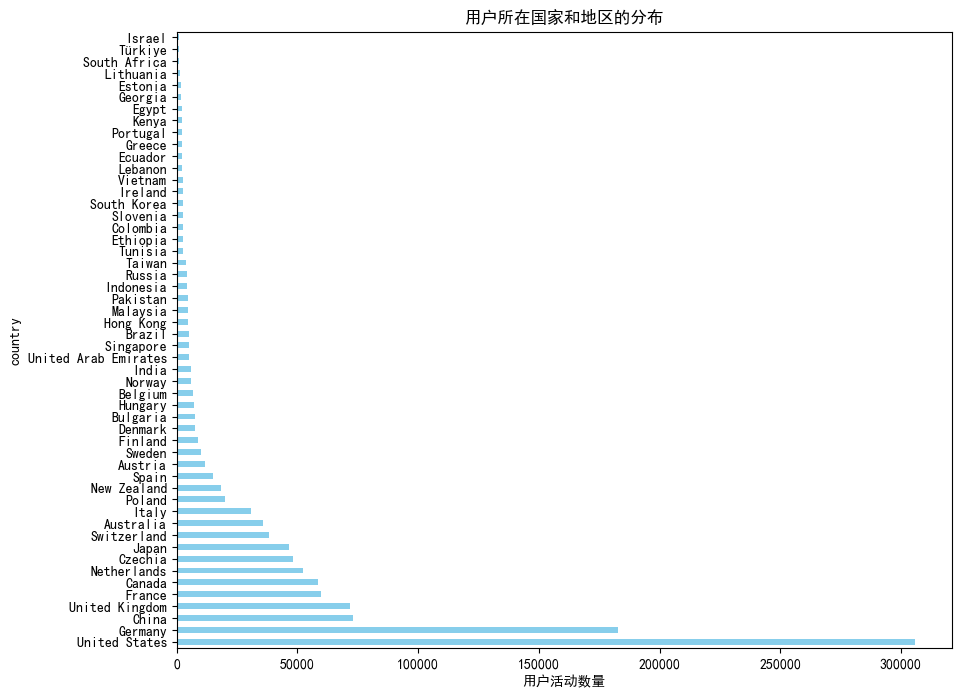

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
df['country'] = df['country'].astype(str)
country_distribution = df['country'].value_counts()
plt.figure(figsize=(10, 8))
country_distribution.plot(kind='barh', color='skyblue')
plt.title('用户所在国家和地区的分布')
plt.xlabel('用户活动数量')
plt.show()

- 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。

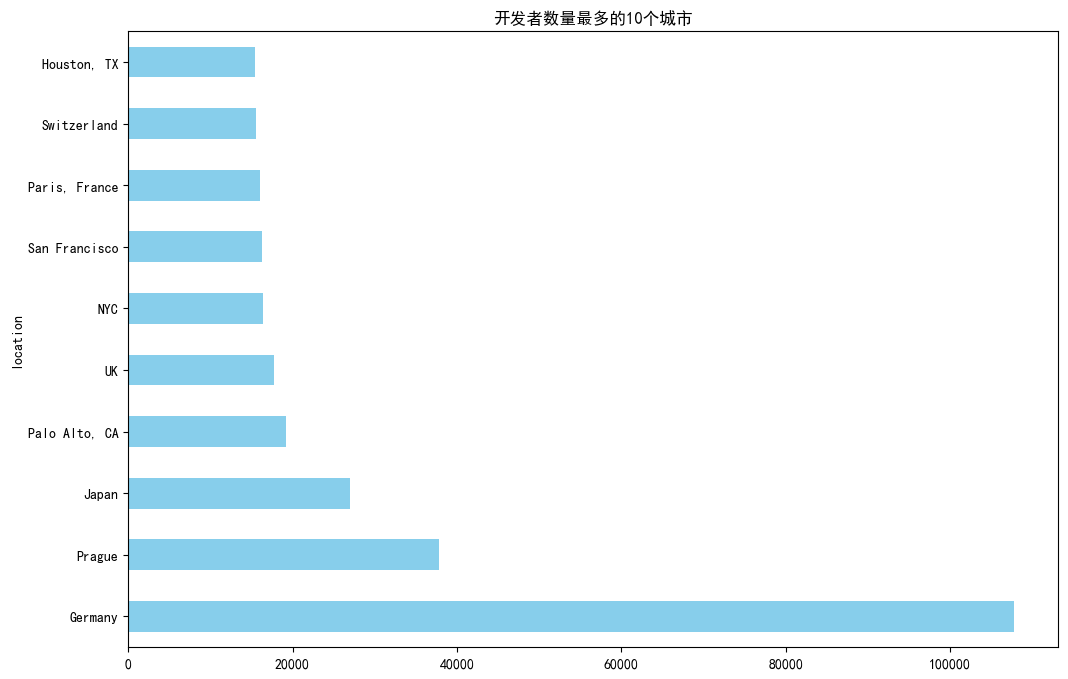

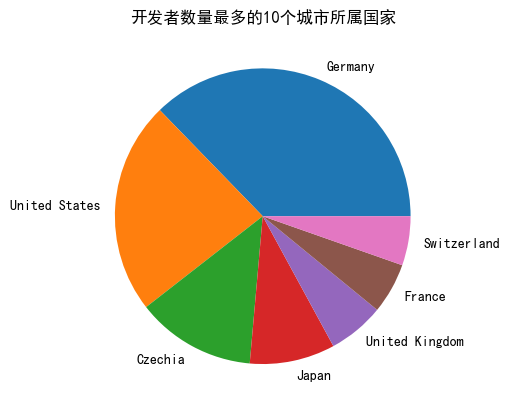

In [69]:
# 筛选开发者数量最多的10个城市的数据
city_developer_count = df['location'].value_counts().head(10)
# 创建条形图
plt.figure(figsize=(12, 8))
city_developer_count.plot(kind='barh', color='skyblue')
plt.title('开发者数量最多的10个城市')
plt.show()
#可视化这些城市所属的国家及其开发者数量
top_cities_data = df[df['location'].isin(city_developer_count.index.tolist())]
top_cities_data['country'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('开发者数量最多的10个城市所属国家')
plt.show()

- 时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。

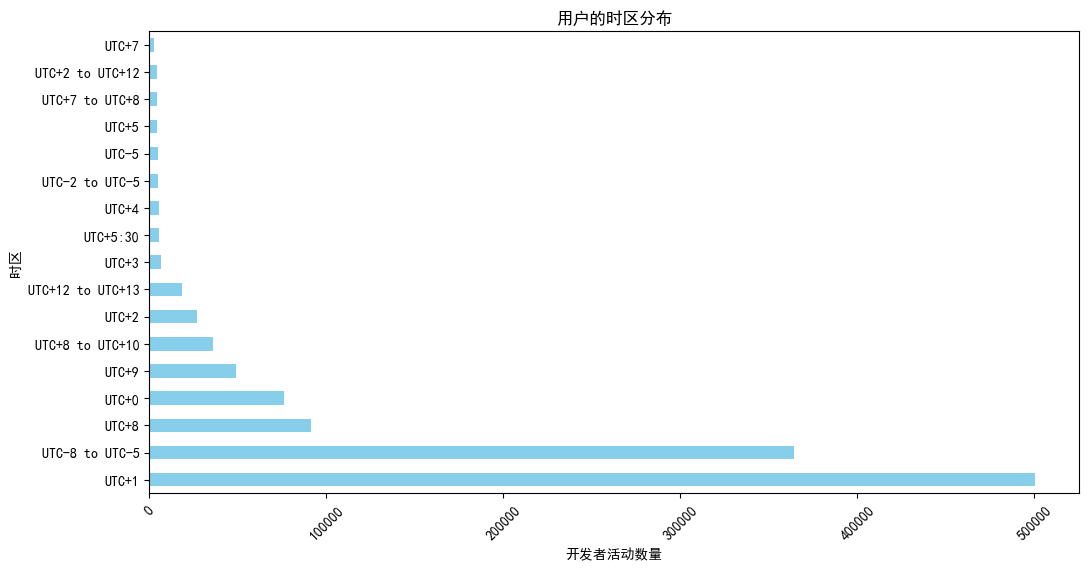

In [96]:
# 国家到时区的映射字典
country_to_timezone = {
    'United States': 'UTC-8 to UTC-5',
    'Germany': 'UTC+1',
    'China': 'UTC+8',
    'United Kingdom': 'UTC+0',
    'France': 'UTC+1',
    'Canada': 'UTC-8 to UTC-5',
    'Netherlands': 'UTC+1',
    'Czechia': 'UTC+1',
    'Japan': 'UTC+9',
    'Switzerland': 'UTC+1',
    'Australia': 'UTC+8 to UTC+10',
    'Italy': 'UTC+1',
    'Poland': 'UTC+1',
    'New Zealand': 'UTC+12 to UTC+13',
    'Spain': 'UTC+1',
    'Austria': 'UTC+1',
    'Sweden': 'UTC+1',
    'Finland': 'UTC+2',
    'Denmark': 'UTC+1',
    'Bulgaria': 'UTC+2',
    'Hungary': 'UTC+1',
    'Belgium': 'UTC+1',
    'Norway': 'UTC+1',
    'India': 'UTC+5:30',
    'United Arab Emirates': 'UTC+4',
    'Singapore': 'UTC+8',
    'Brazil': 'UTC-2 to UTC-5',
    'Hong Kong': 'UTC+8',
    'Malaysia': 'UTC+8',
    'Pakistan': 'UTC+5',
    'Indonesia': 'UTC+7 to UTC+8',
    'Russia': 'UTC+2 to UTC+12',
    'Taiwan': 'UTC+8',
    'Tunisia': 'UTC+1',
    'Ethiopia': 'UTC+3',
    'Colombia': 'UTC-5',
    'Slovenia': 'UTC+1',
    'South Korea': 'UTC+9',
    'Ireland': 'UTC+0',
    'Vietnam': 'UTC+7',
    'Lebanon': 'UTC+2',
    'Ecuador': 'UTC-5',
    'Greece': 'UTC+2',
    'Portugal': 'UTC+0',
    'Kenya': 'UTC+3',
    'Egypt': 'UTC+2',
    'Georgia': 'UTC+3',
    'Estonia': 'UTC+2',
    'South Africa': 'UTC+2',
    'Türkiye': 'UTC+2',
    'Israel': 'UTC+2',
}
# 添加新列记录时区数据
df['timezone'] = df['country'].map(country_to_timezone)
timezone_user_count = df['timezone'].value_counts()
# 可视化各个时区的用户数量
plt.figure(figsize=(12, 6))
timezone_user_count.plot(kind='barh', color='skyblue')
plt.title('用户的时区分布')
plt.ylabel('时区')
plt.xlabel('开发者活动数量')
plt.xticks(rotation=45) 
plt.show()

## 协作行为分析
- 提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

In [73]:
# 筛选出表示提交行为的事件类型
submission_events = ['PushEvent', 'PullRequestEvent', 'IssueCommentEvent']
df_submissions = df[df['event_type'].isin(submission_events)]
# 按用户聚合并计数提交次数
user_submission_count = df_submissions['user_id'].value_counts()
# 使用中位数作为阈值区分高活跃和低活跃用户
median_submissions = user_submission_count.median()
high_active_users = user_submission_count[user_submission_count > median_submissions]
low_active_users = user_submission_count[user_submission_count <= median_submissions]
print("高活跃用户（提交次数高于中位数）:")
print(high_active_users)
print("\n低活跃用户（提交次数等于或低于中位数）:")
print(low_active_users)

高活跃用户（提交次数高于中位数）:
user_id
11146458    36224
158862      26364
28706372    16888
1580956      9668
8188402      8301
            ...  
322311       1214
54324534     1213
3837120      1210
49056869     1206
5284924      1197
Name: count, Length: 230, dtype: int64

低活跃用户（提交次数等于或低于中位数）:
user_id
7608904    1194
709451     1194
104888     1192
507615     1191
4196       1188
           ... 
3162115     366
1609022     354
490484      277
814283       41
985347       18
Name: count, Length: 232, dtype: int64


- 每个国家高活跃用户和低活跃用户的分布

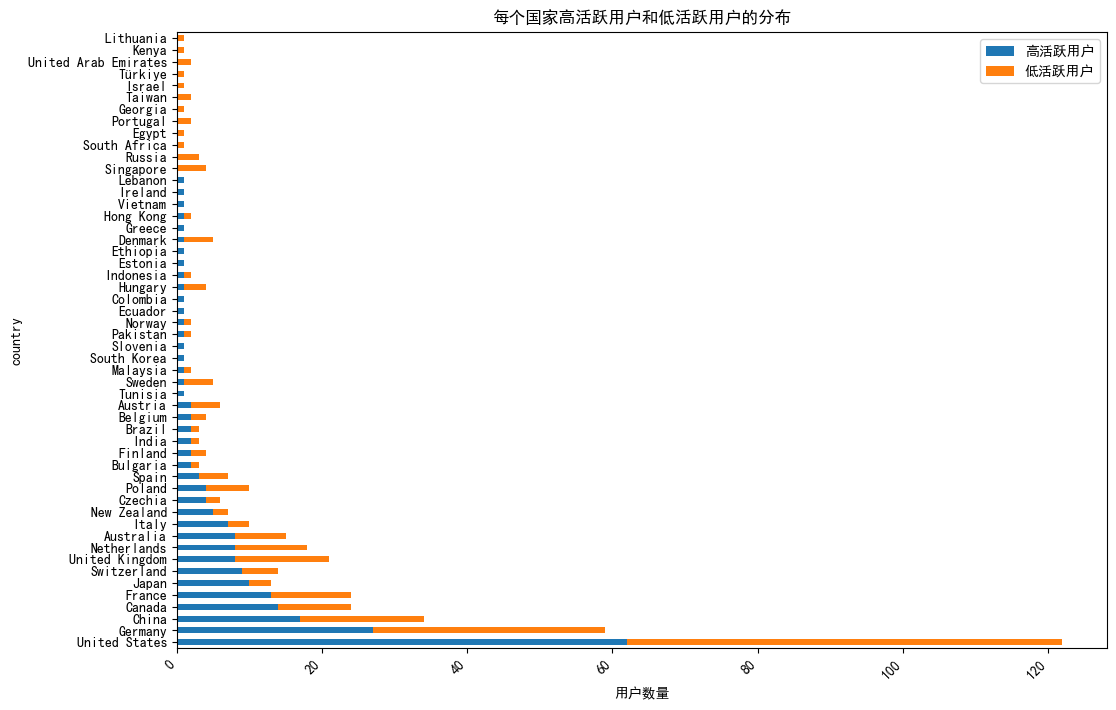

In [113]:
# 将高活跃和低活跃用户的数据合并到一个新的数据框中
high_active_users_df = df[df['user_id'].isin(high_active_users.index)][['user_id', 'country']].drop_duplicates().groupby('country').size().reset_index(name='high_active_count')
low_active_users_df = df[df['user_id'].isin(low_active_users.index)][['user_id', 'country']].drop_duplicates().groupby('country').size().reset_index(name='low_active_count')
# 合并高活跃和低活跃用户的计数数据
country_user_count = pd.merge(high_active_users_df, low_active_users_df, on='country', how='outer').fillna(0)
# 按高活跃用户数量降序排列
country_user_count = country_user_count.sort_values(by='high_active_count', ascending=False)
# 绘制堆叠柱状图
country_user_count.plot(kind='barh', x='country', y=['high_active_count', 'low_active_count'], stacked=True,figsize=(12, 8))
# 添加图例和标签
plt.title('每个国家高活跃用户和低活跃用户的分布')
plt.xlabel('用户数量')
plt.xticks(rotation=45, ha='right')
plt.legend(['高活跃用户', '低活跃用户'])
# 显示图形
plt.show()

## 其他维度有趣的洞察（至少2个）
- 用户参与的事件类型event_type分布

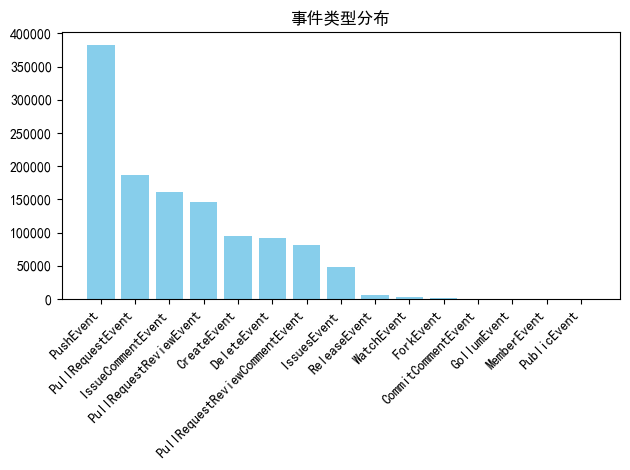

In [91]:
event_type_counts = df['event_type'].value_counts()
plt.bar(event_type_counts.index, event_type_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('事件类型分布')
plt.tight_layout()
plt.show()

- 用户的参与度（同一用户的记录数）与总影响力得分之间的关系

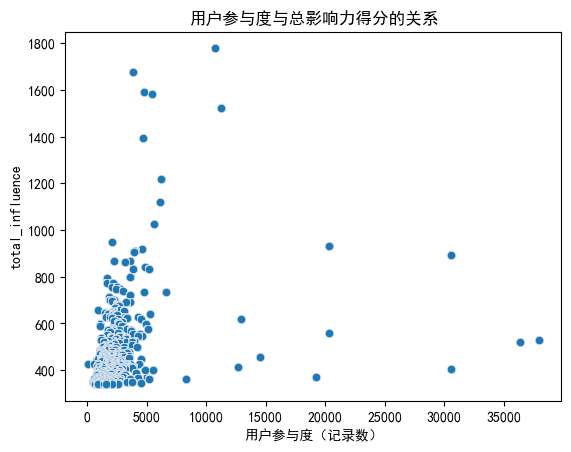

In [100]:
import seaborn as sns
# 计算每个用户的参与度（记录数）
df['participation'] = df.groupby('user_id')['user_id'].transform('count')
sns.scatterplot(data=df, x='participation', y='total_influence', alpha=0.5)
plt.title('用户参与度与总影响力得分的关系')
plt.xlabel('用户参与度（记录数）')
plt.show()
